NOTE: This notebook is done on Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pickle-mixin
!pip install -U scikit-learn
!pip install xgboost

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-cp37-none-any.whl size=5999 sha256=0ea67bb339572fcc0a5ee31e78c5f0ad984cd3a3204e95d1567817793bc0324c
  Stored in directory: /root/.cache/pip/wheels/cd/05/42/71de70fa36b9cbb7657bb5793a16f8028c1cdc1bdd3b8e1ac3
Successfully built pickle-mixin
     |████████████████████████████████| 22.3MB 1.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [41]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV

sns.set_theme(style="darkgrid")

#Load Data

In [7]:
root_path='/content/drive/MyDrive/ML Project/online_shopping_analysis'
data_path=f'{root_path}/processed_data.csv'
label_path=f'{root_path}/data_label.csv'

In [8]:
raw_processed_data = pd.read_csv(data_path)
raw_processed_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1


In [9]:
data_label = pd.read_csv(label_path)
data_label.head()

,label
0,0
1,0
2,0
3,0
4,0


# Scale data

In [10]:
"""StandarScaler"""
standard_scaler = preprocessing.StandardScaler().fit(raw_processed_data)
standardized_data = standard_scaler.transform(raw_processed_data)
standardized_data

array([[-0.69699296, -0.45773627, -0.39636998, ..., -0.76262903,
        -0.40102509, -0.55055169],
       [-0.69699296, -0.45773627, -0.39636998, ..., -0.51418219,
        -0.40102509, -0.55055169],
       [-0.69699296, -0.46339389, -0.39636998, ..., -0.26573535,
        -0.40102509, -0.55055169],
       ...,
       [-0.69699296, -0.45773627, -0.39636998, ...,  2.21873304,
        -0.40102509,  1.81635987],
       [ 0.50722805, -0.03341489, -0.39636998, ...,  1.72183936,
        -0.40102509, -0.55055169],
       [-0.69699296, -0.45773627, -0.39636998, ..., -0.51418219,
         2.25167844,  1.81635987]])

In [11]:
standardized_data.mean(axis=0)

array([-2.99661170e-17, -9.45085228e-17,  3.22712029e-17,  2.07457733e-17,
        3.68813748e-17, -9.22034369e-18, -3.45762888e-17,  3.91864607e-17,
        1.06033952e-16, -5.53220622e-17, -2.21288249e-16,  4.61017185e-18,
        1.49830585e-17,  7.72203784e-17, -2.99661170e-17, -2.25898420e-16,
        2.30508592e-18])

In [12]:
standardized_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
"""MaxMINScaler"""
max_min_scaler= preprocessing.MinMaxScaler()
max_min_data = max_min_scaler.fit_transform(raw_processed_data)
max_min_data

array([[0.00000000e+00, 2.94139275e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.94139275e-04, 0.00000000e+00, ...,
        5.26315789e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.05263158e-01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.94139275e-04, 0.00000000e+00, ...,
        6.31578947e-01, 0.00000000e+00, 1.00000000e+00],
       [1.48148148e-01, 2.23545849e-02, 0.00000000e+00, ...,
        5.26315789e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.94139275e-04, 0.00000000e+00, ...,
        5.26315789e-02, 5.00000000e-01, 1.00000000e+00]])

In [14]:
"""MaxAbsScaler for sparse data"""
max_abs_scaler = preprocessing.MaxAbsScaler()
max_abs_data = max_abs_scaler.fit_transform(raw_processed_data)
max_abs_data

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.00000000e-02,  3.33333333e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e-01,  3.33333333e-01,  0.00000000e+00],
       [ 0.00000000e+00, -2.94225818e-04,  0.00000000e+00, ...,
         1.50000000e-01,  3.33333333e-01,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.50000000e-01,  3.33333333e-01,  1.00000000e+00],
       [ 1.48148148e-01,  2.20669364e-02,  0.00000000e+00, ...,
         5.50000000e-01,  3.33333333e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e-01,  6.66666667e-01,  1.00000000e+00]])

In [15]:
"""PowerTransofmr, convert to gaussian distribution"""
power_scaler = preprocessing.PowerTransformer(method='yeo-johnson')
gaussian_data = power_scaler.fit_transform(raw_processed_data)

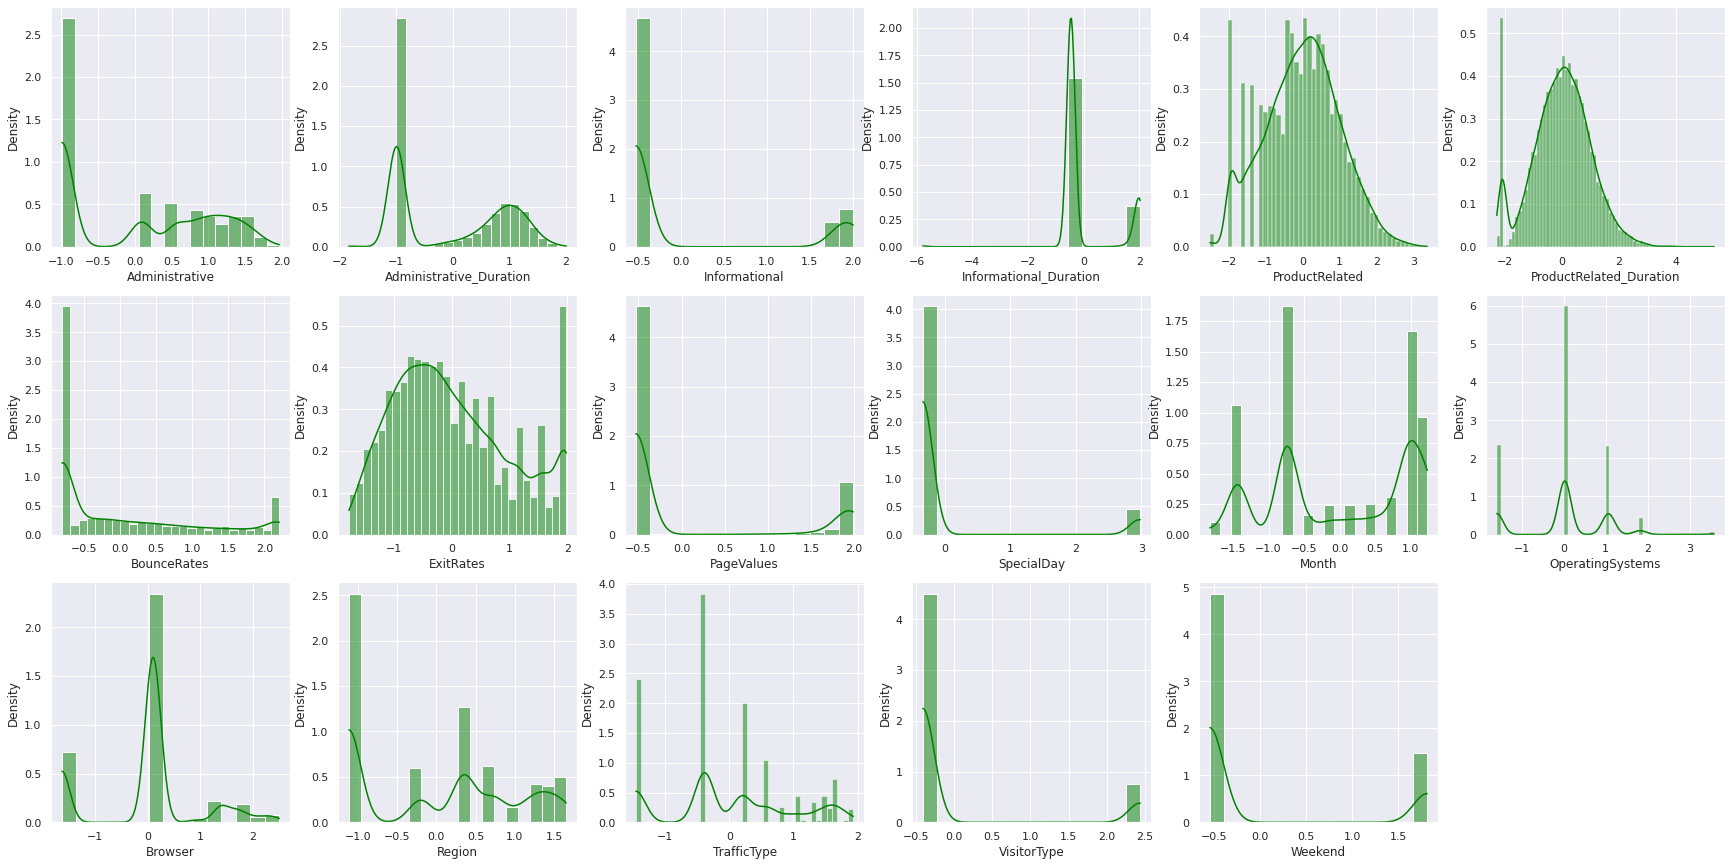

In [16]:
gaussian_data_frame = pd.DataFrame(gaussian_data,columns=raw_processed_data.columns.values)

plt.figure(figsize=(30,15))
for index, col_name in enumerate(gaussian_data_frame.columns.values):
  ax_sub=plt.subplot(3,6, index+1);
  ax_sns = sns.histplot(data=gaussian_data_frame[col_name], ax=ax_sub, kde=True, stat='density', color='green')

In [17]:
"""QuantileTransform, convert to uniform distribution"""
quantile_scaler = preprocessing.QuantileTransformer(random_state=123)
uniform_data = quantile_scaler.fit_transform(raw_processed_data)
uniform_data

array([[0.        , 0.24024024, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.24024024, 0.        , ..., 0.35735736, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.5990991 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.24024024, 0.        , ..., 0.94744745, 0.        ,
        1.        ],
       [0.77327327, 0.70770771, 0.        , ..., 0.90740741, 0.        ,
        0.        ],
       [0.        , 0.24024024, 0.        , ..., 0.35735736, 0.92442442,
        1.        ]])

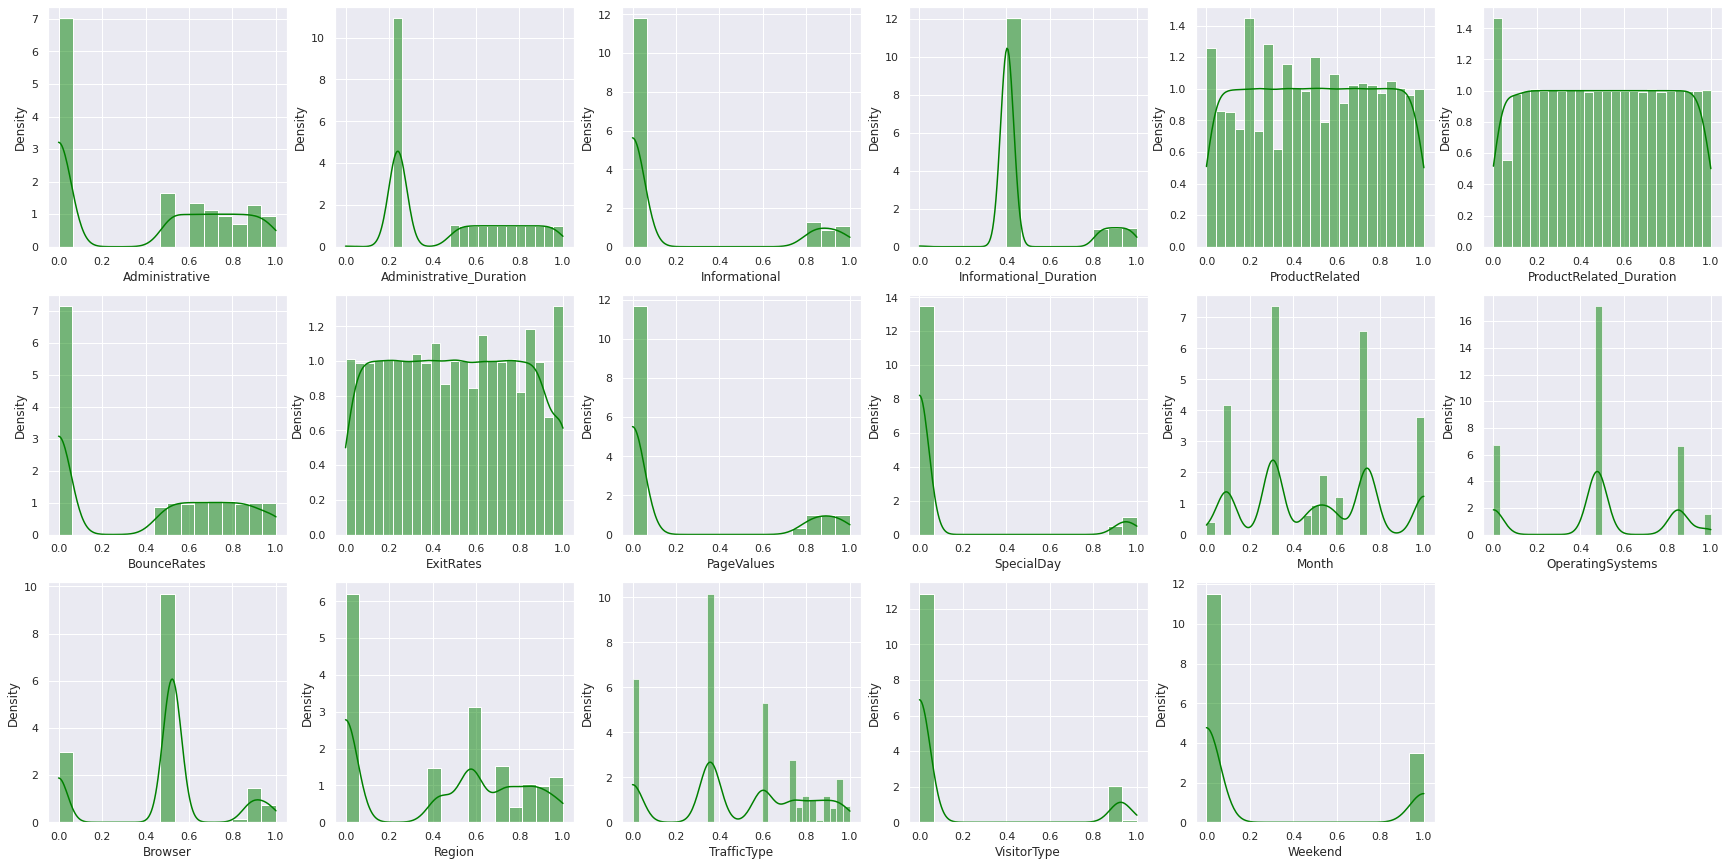

In [18]:
uniform_data_frame = pd.DataFrame(uniform_data,columns=raw_processed_data.columns.values)

plt.figure(figsize=(30,15))
for index, col_name in enumerate(uniform_data_frame.columns.values):
  ax_sub=plt.subplot(3,6, index+1);
  ax_sns = sns.histplot(data=uniform_data_frame[col_name], ax=ax_sub, kde=True, stat='density', color='green')

In [19]:
"""Normalization"""
# l1 norm
l1_scaler = preprocessing.Normalizer(norm='l1')
l1_data = l1_scaler.fit_transform(raw_processed_data)
l1_data

array([[ 0.        ,  0.        ,  0.        , ...,  0.11904762,
         0.11904762,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.02628121,
         0.0131406 ,  0.        ],
       [ 0.        , -0.04098361,  0.        , ...,  0.12295082,
         0.04098361,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.05844798,
         0.004496  ,  0.004496  ],
       [ 0.00851026,  0.15956732,  0.        , ...,  0.02340321,
         0.00212756,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.043181  ,
         0.043181  ,  0.0215905 ]])

In [20]:
# l2 norm
l2_scaler = preprocessing.Normalizer(norm='l2')
l2_data = l2_scaler.fit_transform(raw_processed_data)
l2_data

array([[ 0.        ,  0.        ,  0.        , ...,  0.31497039,
         0.31497039,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.03116638,
         0.01558319,  0.        ],
       [ 0.        , -0.09281567,  0.        , ...,  0.27844701,
         0.09281567,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.07020356,
         0.00540027,  0.00540027],
       [ 0.0112758 ,  0.21142116,  0.        , ...,  0.03100844,
         0.00281895,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.08134068,
         0.08134068,  0.04067034]])

In [21]:
# max norm
max_scaler = preprocessing.Normalizer(norm='max')
max_norm_data = max_scaler.fit_transform(raw_processed_data)
max_norm_data

array([[ 0.        ,  0.        ,  0.        , ...,  0.5       ,
         0.5       ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.03125   ,
         0.015625  ,  0.        ],
       [ 0.        , -0.11111111,  0.        , ...,  0.33333333,
         0.11111111,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.07055631,
         0.00542741,  0.00542741],
       [ 0.01156069,  0.21676301,  0.        , ...,  0.03179191,
         0.00289017,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.09411765,
         0.09411765,  0.04705882]])

In [22]:
complete_data_dict ={'standardized_data':standardized_data, 
                     'max_min_data':max_min_data, 
                     'max_abs_data':max_abs_data, 
                     'gaussian_data':gaussian_data, 
                     'uniform_data':uniform_data, 
                     'l1_data':l1_data, 
                     'l2_data':l2_data, 
                     'max_norm_data':max_norm_data}

# GridSearch For Data Modeling

In [79]:
def grid_search_params(complete_data_dict, data_label, grid_params, classifier, path, cv):
  best_params={}
  best_score={}
  best_model={}
  best_matrix={}
  best_roc={}
  best_pre_rec={}

  # grid search
  for index, key in enumerate(complete_data_dict.keys()):
    print('\n')
    print(f'================={key}=====================')
    # load data
    data = complete_data_dict[key]
    # split data
    X_train, X_test, y_train, y_test = train_test_split(data, data_label.values, train_size=0.7, random_state=123, shuffle=True)
    # n-fold verification grid search
    gd_sr = GridSearchCV(estimator=classifier, param_grid=grid_params, scoring='accuracy', cv=cv, n_jobs=-1, verbose=True)
    gd_sr = gd_sr.fit(X_train, y_train.reshape(y_train.shape[0]).astype('float32'))
    # collect best params
    best_params[key]=gd_sr.best_params_
    # collect best models
    best_model[f'{key}'] = gd_sr
    # collect confusion matrix
    predict_label = gd_sr.predict(X_test)
    best_matrix[f'{key}'] = confusion_matrix(y_test, predict_label)
    # collect classification metircs(accuracy, precision, recall, f1-score)
    tn, fp, fn, tp = confusion_matrix(y_test, predict_label).ravel()
    acc = (tp+tn)/(tn+fp+fn+tp)
    precision = tp/(fp+tp)
    recall = tp/(tp+fn)
    f1 = 2*(precision*recall)/(precision+recall)
    auc = roc_auc_score(y_test, predict_label)
    avg_precision_score = average_precision_score(y_test, predict_label)
    best_score[f'{key}'] = {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1-score': f1,
        'auc':auc,
        'avg_precision_score':avg_precision_score
    }
    # collect ROC curves
    fpr, tpr, thresholds = roc_curve(y_test, predict_label)
    best_roc[f'{key}'] ={
        'fpr':fpr,
        'tpr':tpr,
        'thresholds':thresholds,
    }
    # collect precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, predict_label)
    best_pre_rec[f'{key}']={
        'precision':precision,
        'recall':recall,
        'thresholds':thresholds,
    }
  # save best params in the file
  temp_file=open(path, "wb")
  pickle.dump([best_params, best_score, best_model, best_matrix, best_roc, best_pre_rec], temp_file)
  temp_file.close()

  return best_params, best_score, best_model, best_matrix, best_roc, best_pre_rec

In [80]:
def plot_confusion_matrix(complete_data_dict, best_matrix):
  plt.figure(figsize=(40,4))
  for index, key in enumerate(complete_data_dict.keys()):
    ax_sub = plt.subplot(1,8, index+1);
    ax = sns.heatmap(best_matrix[f'{key}'], annot=True, fmt='g',linewidths=.5,  cmap="YlGnBu")
    ax.set_title(f'"{key}" Confusion Matrix')
    ax.set_xlabel('Pred Labels')
    ax.set_ylabel('True Labels') 

  plt.tight_layout()
  plt.show()

In [81]:
def plot_roc_curve(complete_data_dict, best_roc, best_scores):
  plt.figure(figsize=(40,4))
  for index, key in enumerate(complete_data_dict.keys()):
    fpr = best_roc[key]['fpr']
    tpr = best_roc[key]['tpr']
    auc = round(best_scores[key]['auc'],3)
    ax_sub = plt.subplot(1,8,index+1)
    ax_roc = sns.lineplot(x=fpr, y=tpr, color='green')
    ax_roc = sns.lineplot(x=[0,1],y=[0,1], color='red')
    ax_roc.lines[1].set_linestyle("--")
    ax_roc.set_title(f'{key}_ROC (AUC {auc})')
    ax_roc.set_xlabel("False Positive Rate")
    ax_roc.set_ylabel("Recall")
    ax_roc.legend(['ROC Curve','Random Guess'])
  plt.tight_layout()
  plt.show()

In [82]:
def plot_precision_recall_curve(complete_data_dict, best_pre_rec, best_scores):
  plt.figure(figsize=(40,4))
  for index, key in enumerate(complete_data_dict.keys()):
    precision = best_pre_rec[key]['precision']
    recall = best_pre_rec[key]['recall']
    avg_preg = round(best_scores[key]['avg_precision_score'],2)
    ax_sub = plt.subplot(1,8,index+1)
    ax_roc = sns.lineplot(x=precision, y=recall, color='green')
    ax_roc.set_title(f'{key} PRC (Avg Precision {avg_preg} )')
    ax_roc.set_xlabel("Precision")
    ax_roc.set_ylabel("Recall")
  plt.tight_layout()
  plt.show()

In [83]:
def plot_classification_metrics(best_scores):
  pd.DataFrame(best_scores.values(), index=best_scores.keys()).plot(kind='barh', figsize=(30,12))
  plt.title("Classification Metrics Under Different Scaler")
  plt.xlabel("Value")
  plt.ylabel("Scaler")
  plt.show()

In [84]:
"""Logistic Regression Grid Search Under Each Scaled Data"""
log_reg_params={
    'C':[1,0.1,0.01,0.001,0.0001],
    'penalty': ['l1','l2'], 
    'fit_intercept':[True],
    'intercept_scaling':np.linspace(0.01,10,20),
    'solver':['liblinear'],
    'dual':[False],
    'tol':[1e-4],
    'class_weight':['balanced'],
    'random_state':[123], 
    'max_iter':[200],
    'multi_class':['auto'], 
    'verbose':[1], 
    'warm_start':[False], 
    'n_jobs':[None],
}

log_reg_classifer = LogisticRegression()

path=f"{root_path}/lrc_best_params.pkl"
best_params, best_score, best_model, best_matrix, best_roc, best_pre_rec= grid_search_params(complete_data_dict, data_label, log_reg_params, log_reg_classifer, path, cv=5)



=================standardized_data=====================
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[LibLinear]

=================max_min_data=====================
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[LibLinear]

=================max_abs_data=====================
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[LibLinear]

=================gaussian_data=====================
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[LibLinear]

=================uniform_data=====================
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[LibLinear]

=================l1_data=====================
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[LibLinear]

=================l2_data=====================
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[LibLinear]

=================max_norm_data=====================
Fitting 5 folds for each of 200 candidates, totalling 

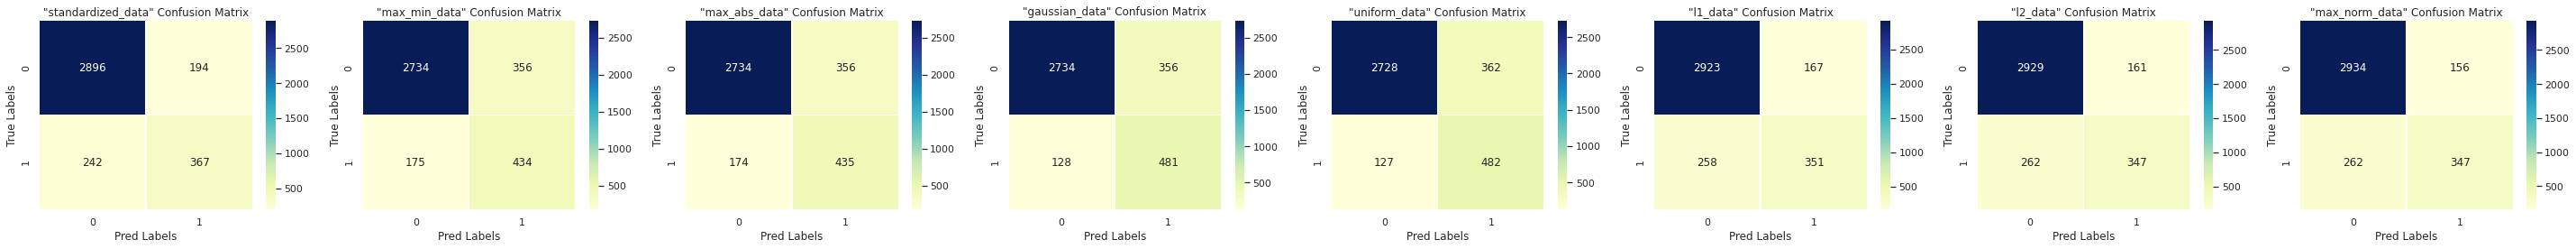

In [85]:
plot_confusion_matrix(complete_data_dict, best_matrix)

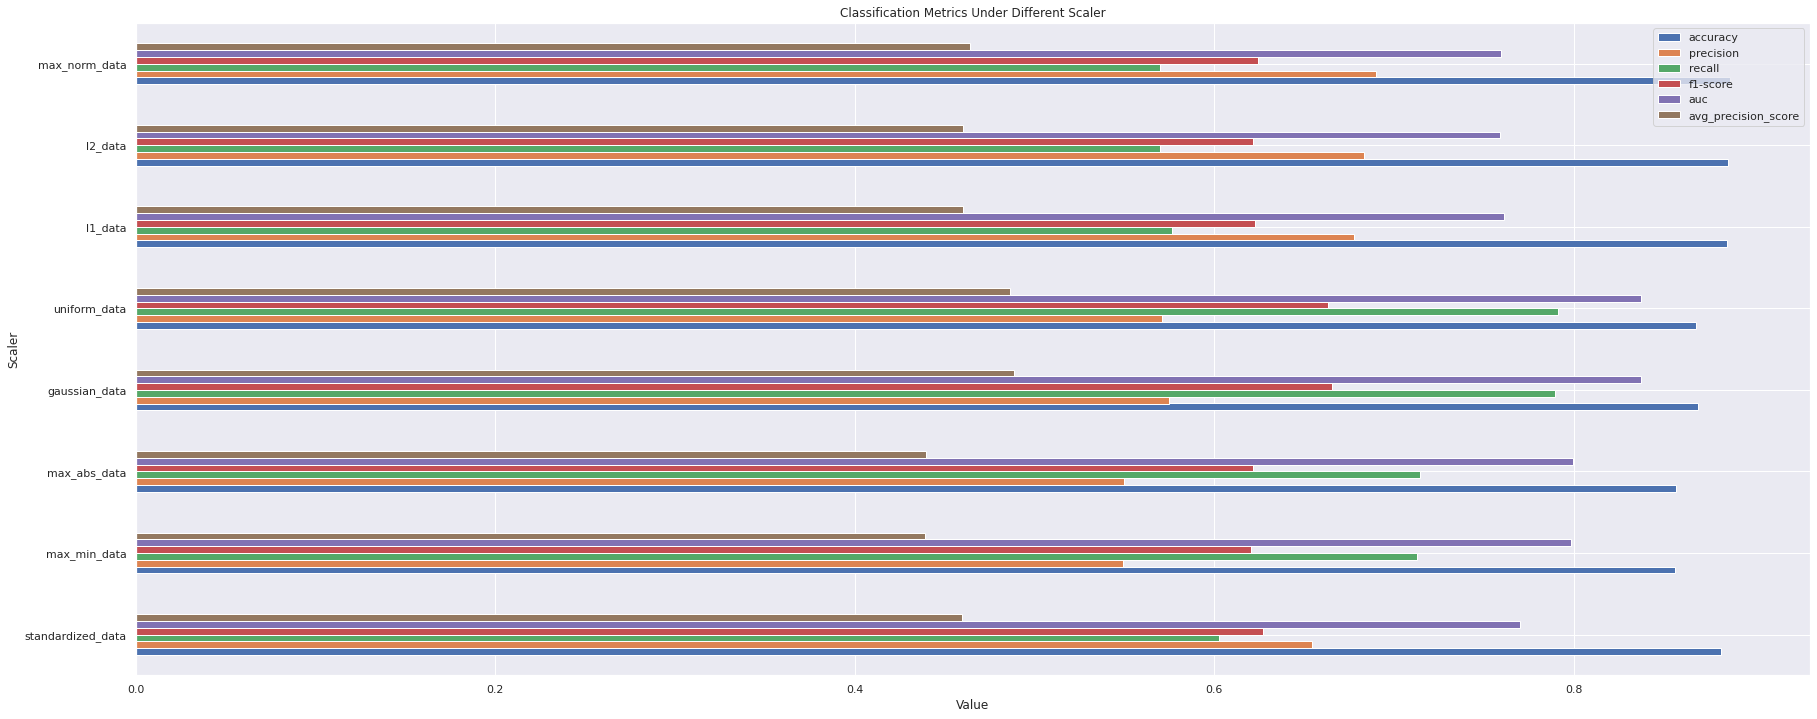

In [86]:
plot_classification_metrics(best_score)

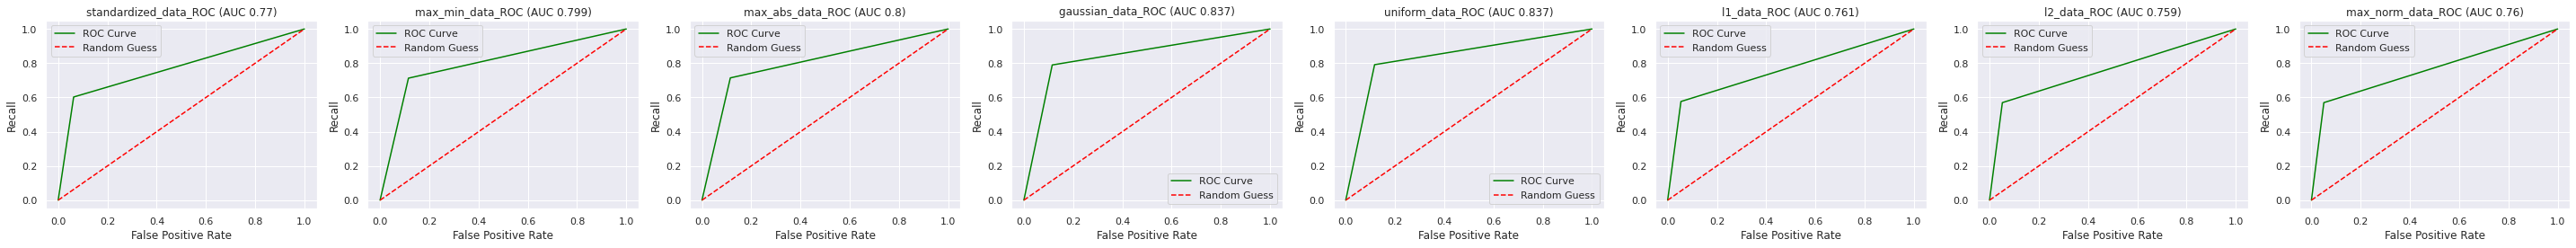

In [87]:
plot_roc_curve(complete_data_dict, best_roc, best_score)

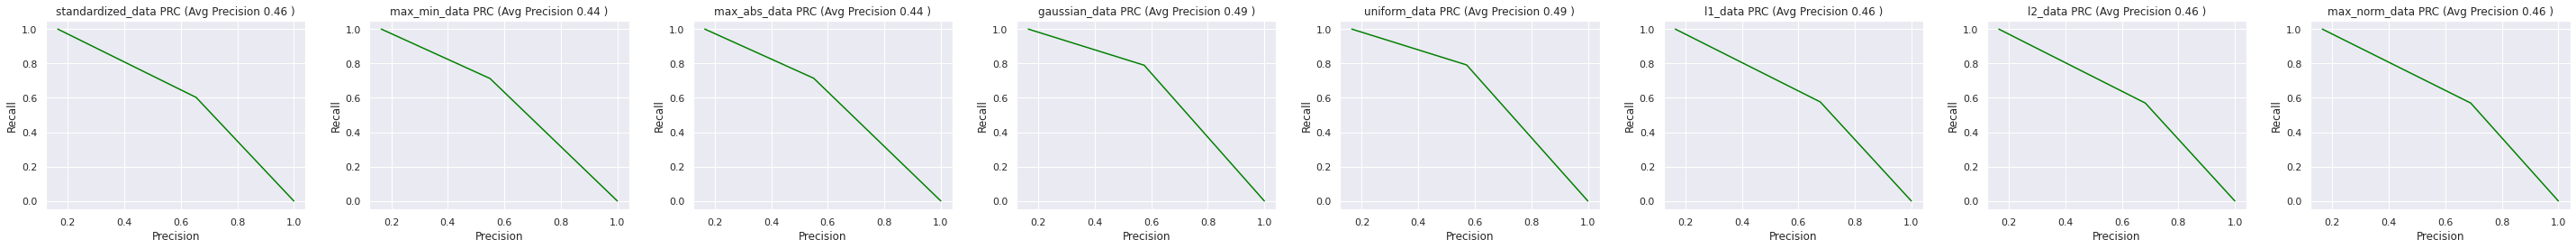

In [88]:
plot_precision_recall_curve(complete_data_dict, best_pre_rec, best_score)

In [89]:
"""SVM Grid Search Under Each Scaled Data"""
svc_params={
    'C': [1,0.1,0.01,0.001,0.0001,0.00001], 
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[2,3,4,5],
}

svc_classifier = SVC(gamma='scale',
                     shrinking=True,
                     probability=False,
                     tol=1e-3,
                     cache_size=200,
                     class_weight='balanced',
                     verbose=True,
                     max_iter=-1,
                     decision_function_shape='ovr',
                     break_ties=False,
                     random_state=123)

path=f"{root_path}/svm_best_params.pkl"
best_params_svm, best_scores_svm, best_model_svm, best_matrix_svm, best_roc_svm, best_pre_rec_svm= grid_search_params(complete_data_dict, data_label, svc_params, svc_classifier, path, cv=5)



=================standardized_data=====================
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LibSVM]

=================max_min_data=====================
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LibSVM]

=================max_abs_data=====================
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LibSVM]

=================gaussian_data=====================
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LibSVM]

=================uniform_data=====================
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LibSVM]

=================l1_data=====================
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LibSVM]

=================l2_data=====================
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LibSVM]

=================max_norm_data=====================
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LibSVM]

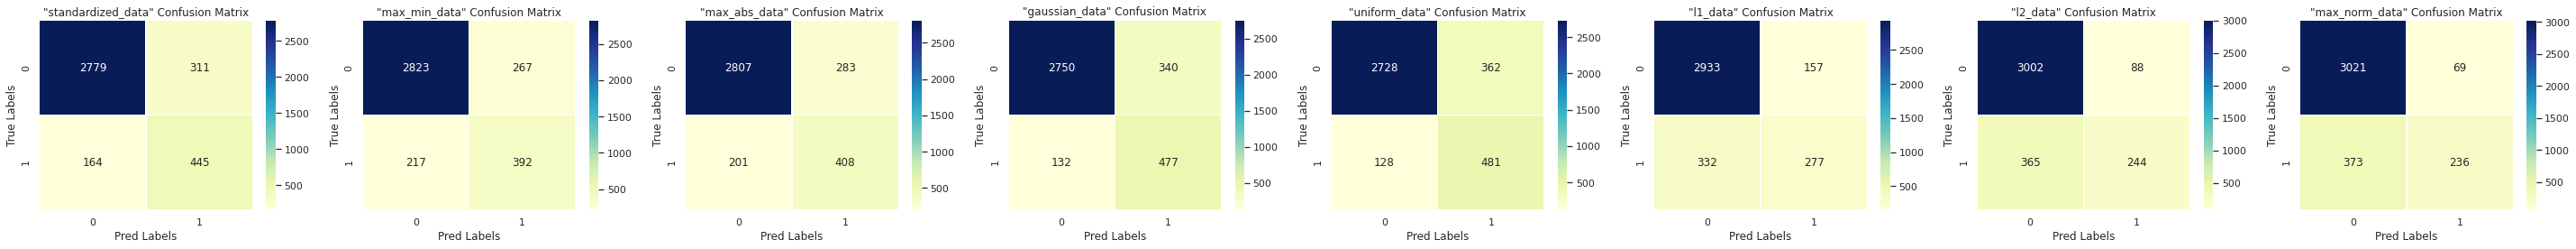

In [90]:
plot_confusion_matrix(complete_data_dict, best_matrix_svm)

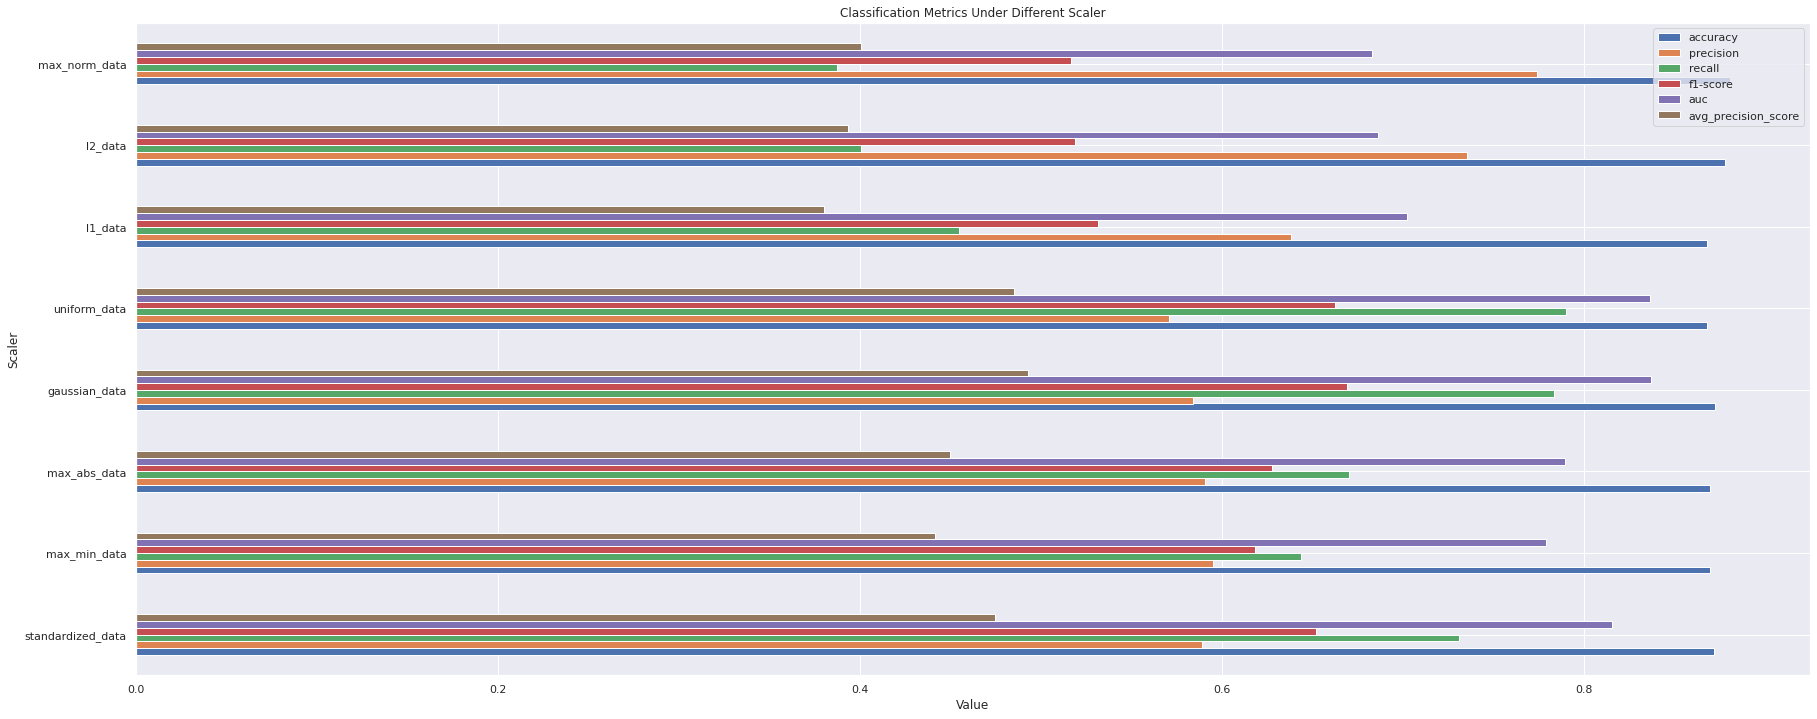

In [91]:
plot_classification_metrics(best_scores_svm)

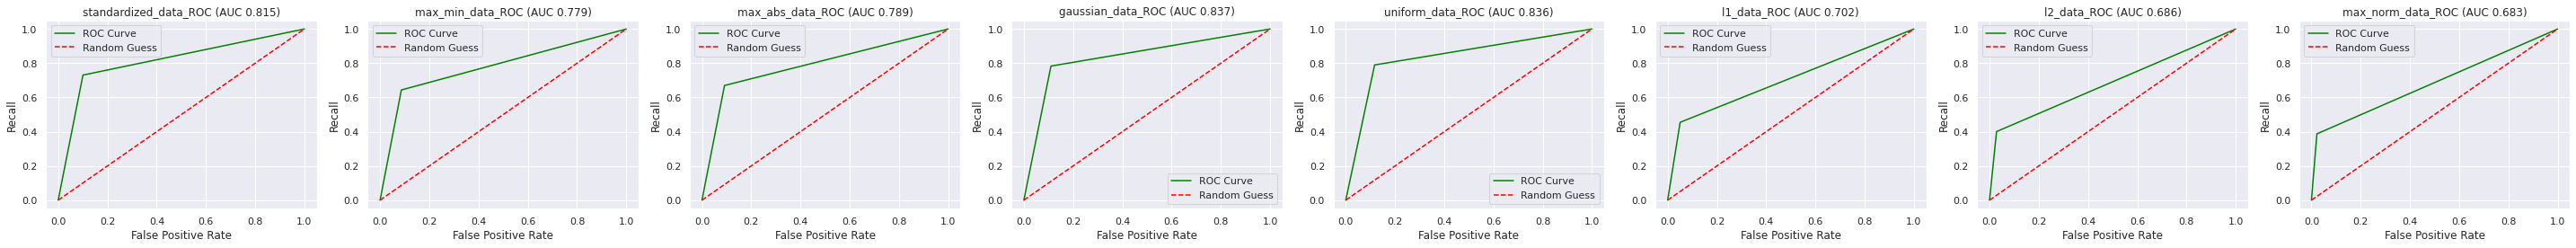

In [92]:
plot_roc_curve(complete_data_dict, best_roc_svm, best_scores_svm)

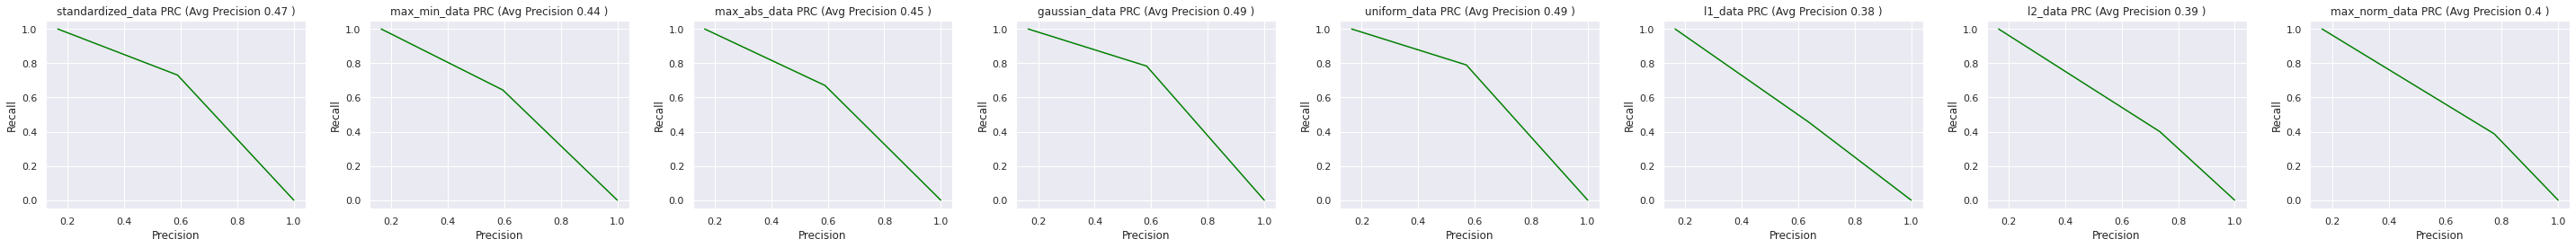

In [93]:
plot_precision_recall_curve(complete_data_dict, best_pre_rec_svm, best_scores_svm)

In [94]:
"""Random Forests Grid Search Under Each Scaled Data"""
rfc_params={
    'n_estimators':[100, 200, 300],
    'criterion':['gini','entropy'],
    'max_depth':[2,3],
    'min_samples_split':[2,5,8],
    'min_samples_leaf':[1,3,5],
    'max_features':['sqrt','log2',None],
    'ccp_alpha':[0.1, 0.01, 0.05],
}

rf_classifier = RandomForestClassifier(bootstrap=True, 
                                      oob_score=True, 
                                      n_jobs=1, 
                                      random_state=123, 
                                      verbose=1, 
                                      warm_start=False, 
                                      class_weight='balanced', 
                                      max_samples=None)

path=f"{root_path}/rfc_best_params.pkl"
best_params_rfc, best_scores_rfc, best_model_rfc, best_matrix_rfc, best_roc_rfc, best_pre_rec_rfc= grid_search_params(complete_data_dict, data_label, rfc_params, rf_classifier, path, cv=5)



=================standardized_data=====================
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished




=================max_min_data=====================
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished




=================max_abs_data=====================
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished




=================gaussian_data=====================
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished




=================uniform_data=====================
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished




=================l1_data=====================
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished




=================l2_data=====================
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished




=================max_norm_data=====================
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


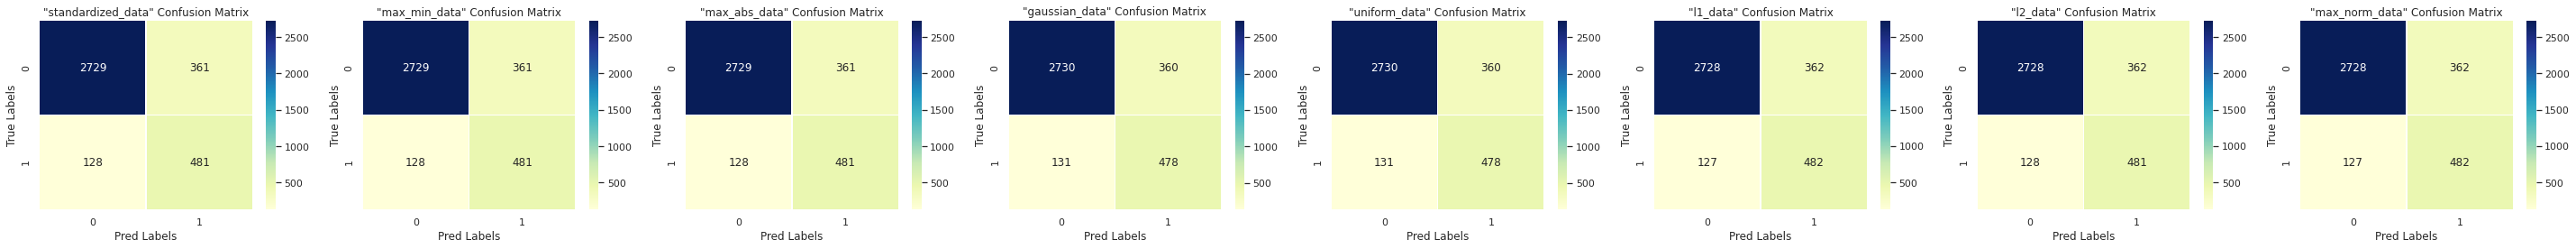

In [95]:
plot_confusion_matrix(complete_data_dict, best_matrix_rfc)

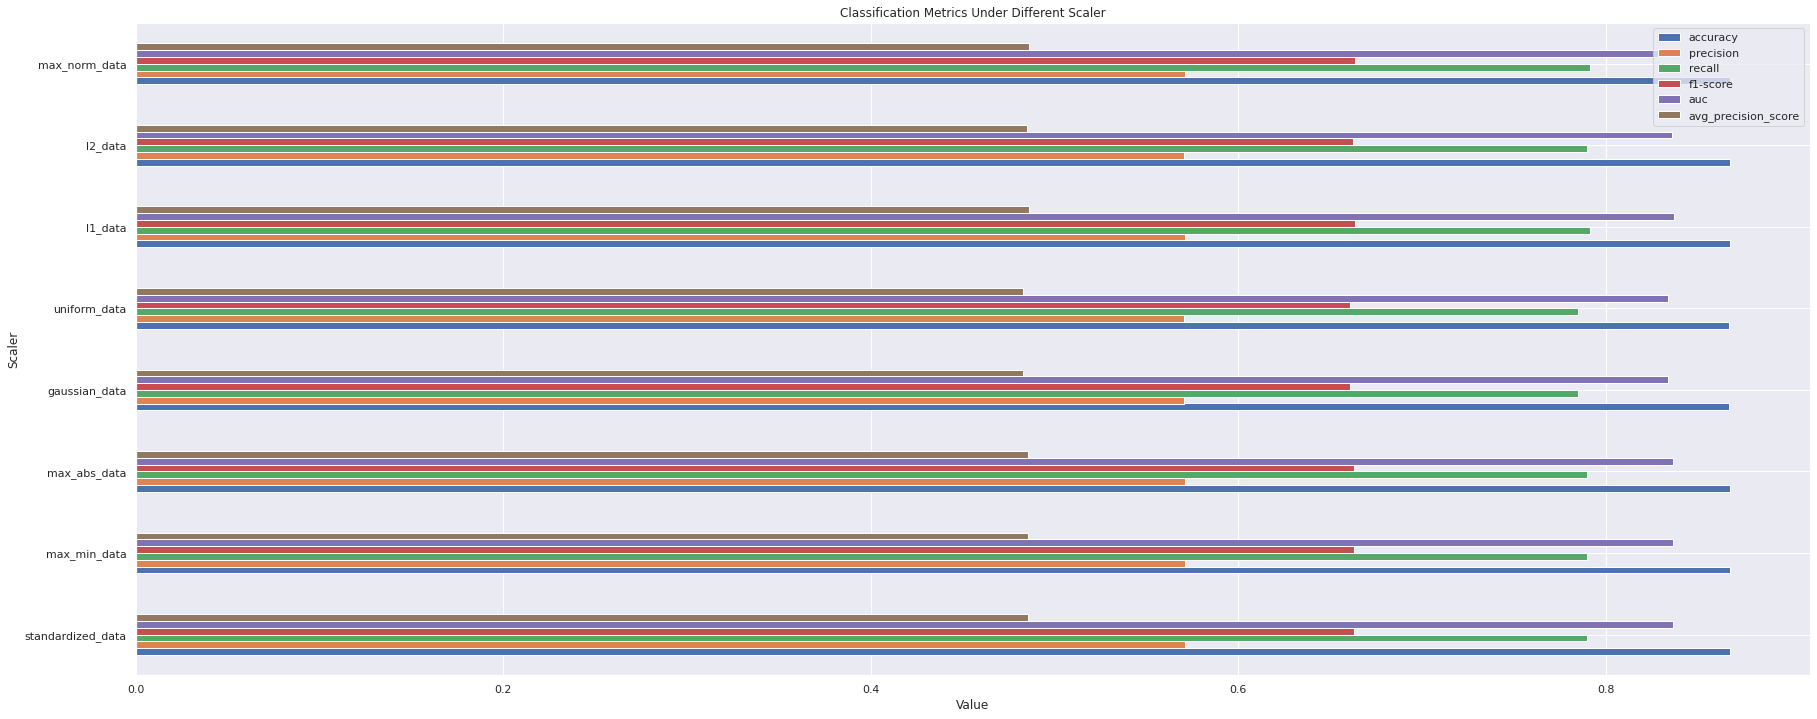

In [96]:
plot_classification_metrics(best_scores_rfc)

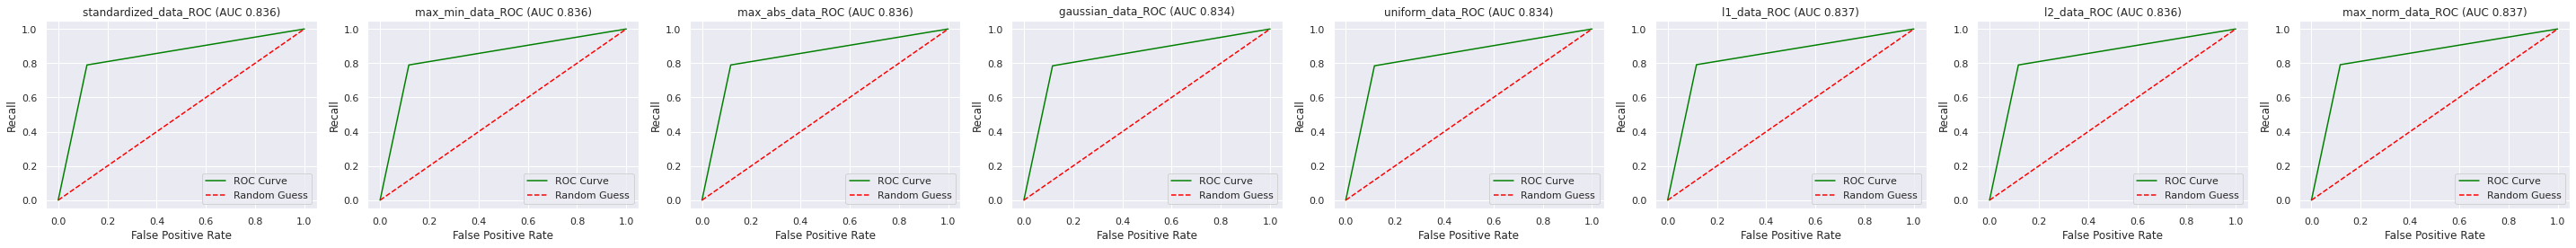

In [97]:
plot_roc_curve(complete_data_dict, best_roc_rfc, best_scores_rfc)

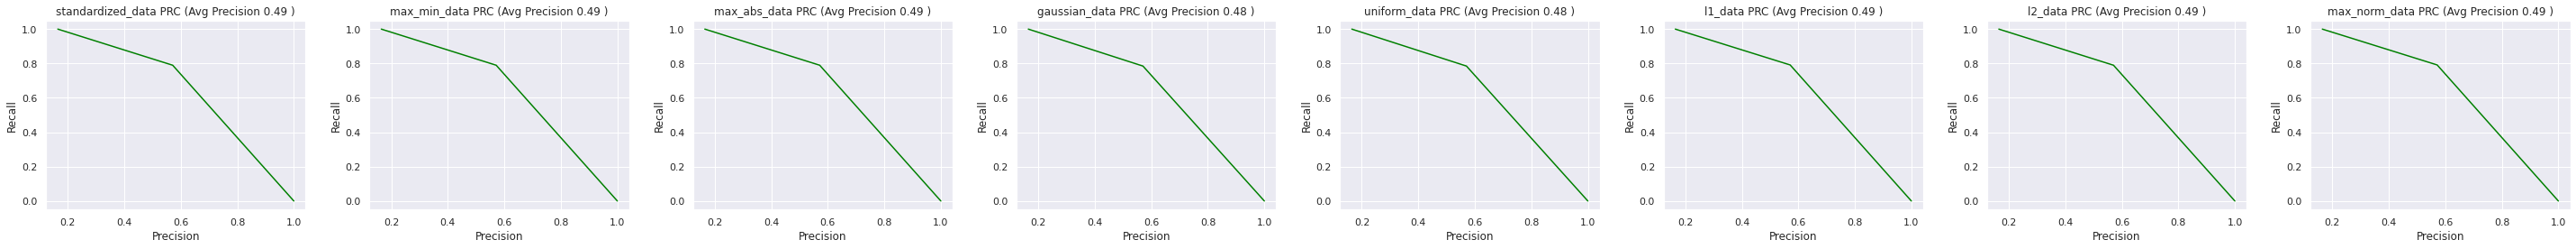

In [98]:
plot_precision_recall_curve(complete_data_dict, best_pre_rec_rfc, best_scores_rfc)

In [99]:
"""KNN Grid Search Under Each Scaled Data"""
knn_params={
    'n_neighbors':[3,4,5,6],
    'weights':['uniform', 'distance'],
    'algorithm':['auto'],
    'leaf_size':[10,20,30],    
    'p':np.linspace(1,3,3),
    }

knn_classifier = KNeighborsClassifier(metric='minkowski', n_jobs=None)

path=f"{root_path}/knn_best_params.pkl"
best_params_knn, best_scores_knn, best_model_knn, best_matrix_knn, best_roc_knn, best_pre_rec_knn= grid_search_params(complete_data_dict, data_label, knn_params, knn_classifier, path, cv=5)



=================standardized_data=====================
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning




=================max_min_data=====================
Fitting 5 folds for each of 72 candidates, totalling 360 fits


=================max_abs_data=====================
Fitting 5 folds for each of 72 candidates, totalling 360 fits


=================gaussian_data=====================
Fitting 5 folds for each of 72 candidates, totalling 360 fits


=================uniform_data=====================
Fitting 5 folds for each of 72 candidates, totalling 360 fits


=================l1_data=====================
Fitting 5 folds for each of 72 candidates, totalling 360 fits


=================l2_data=====================
Fitting 5 folds for each of 72 candidates, totalling 360 fits


=================max_norm_data=====================
Fitting 5 folds for each of 72 candidates, totalling 360 fits


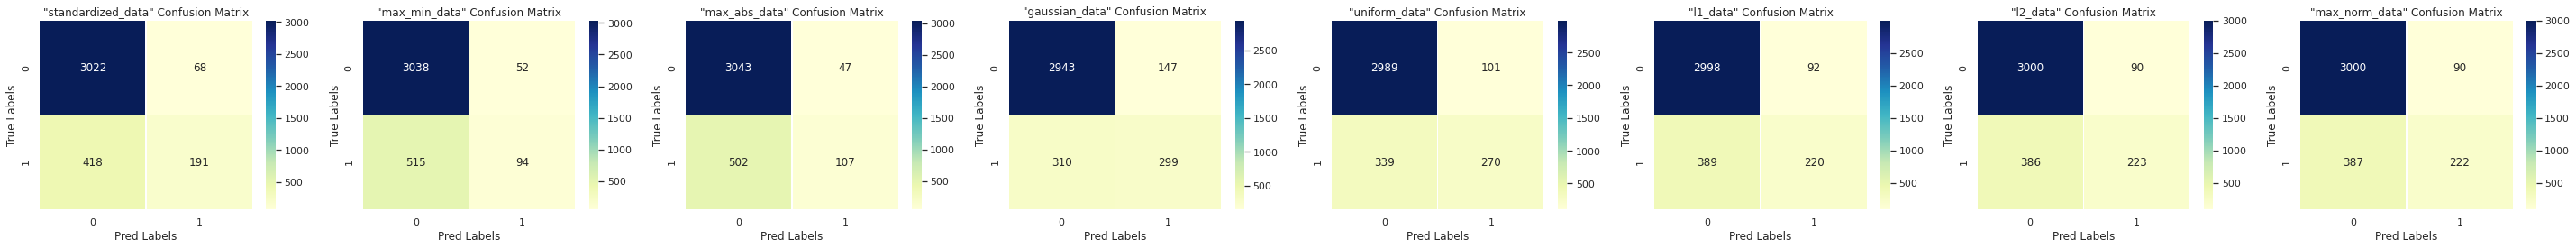

In [100]:
plot_confusion_matrix(complete_data_dict, best_matrix_knn)

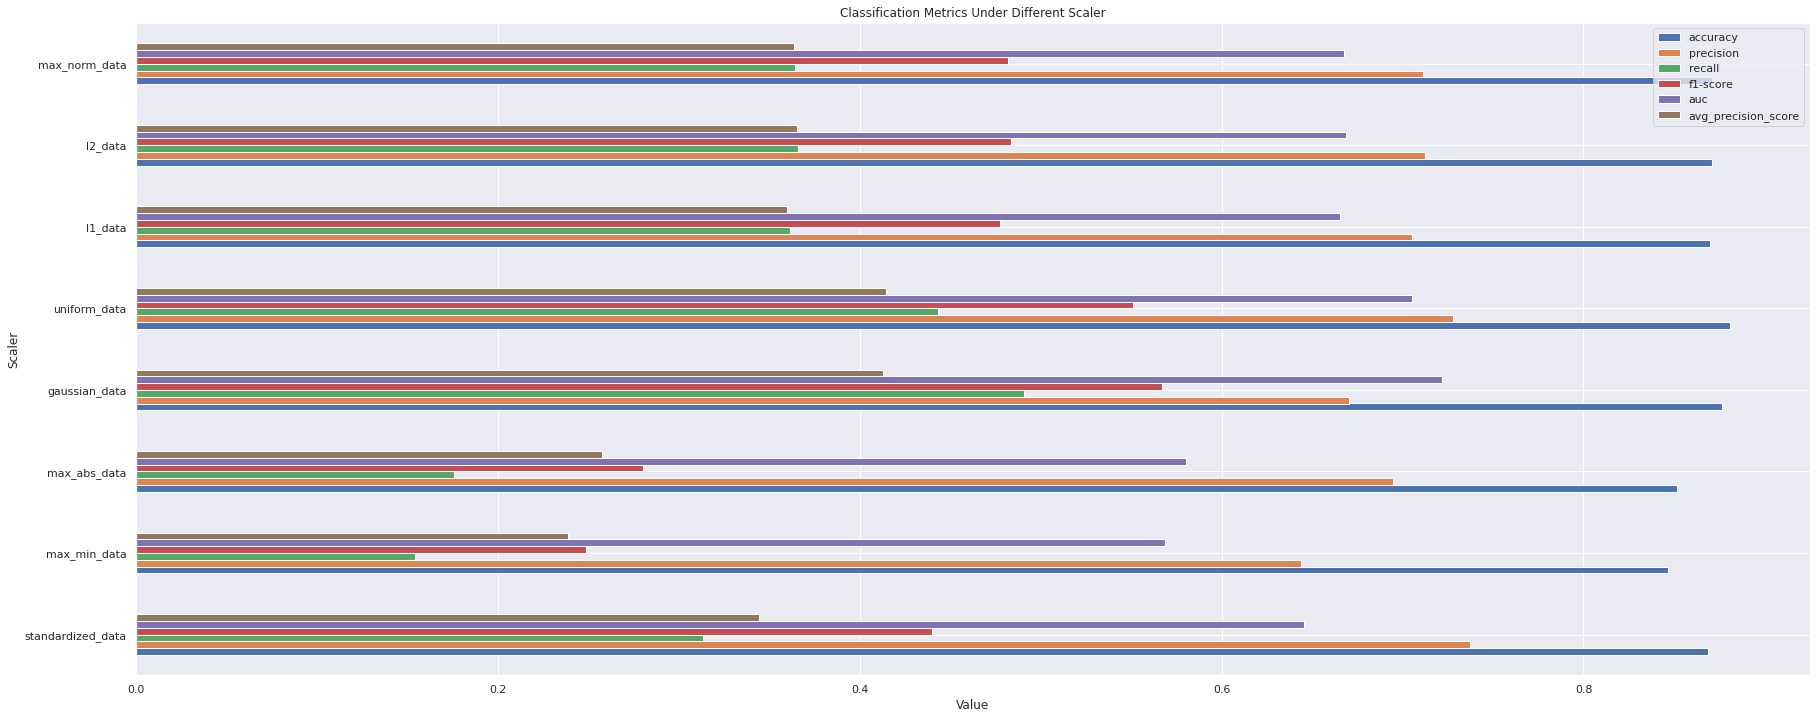

In [101]:
plot_classification_metrics(best_scores_knn)

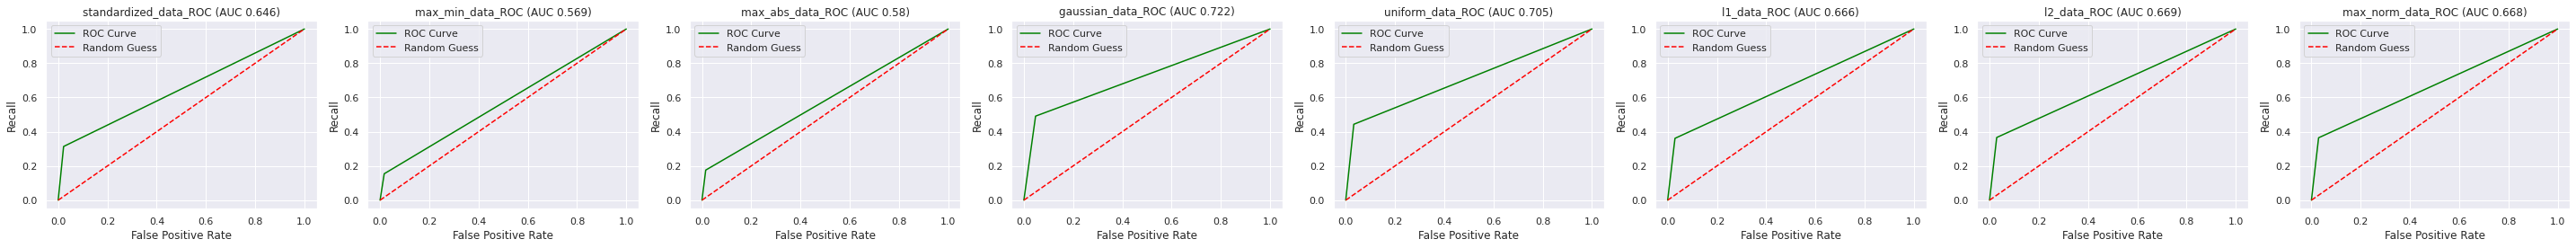

In [102]:
plot_roc_curve(complete_data_dict, best_roc_knn, best_scores_knn)

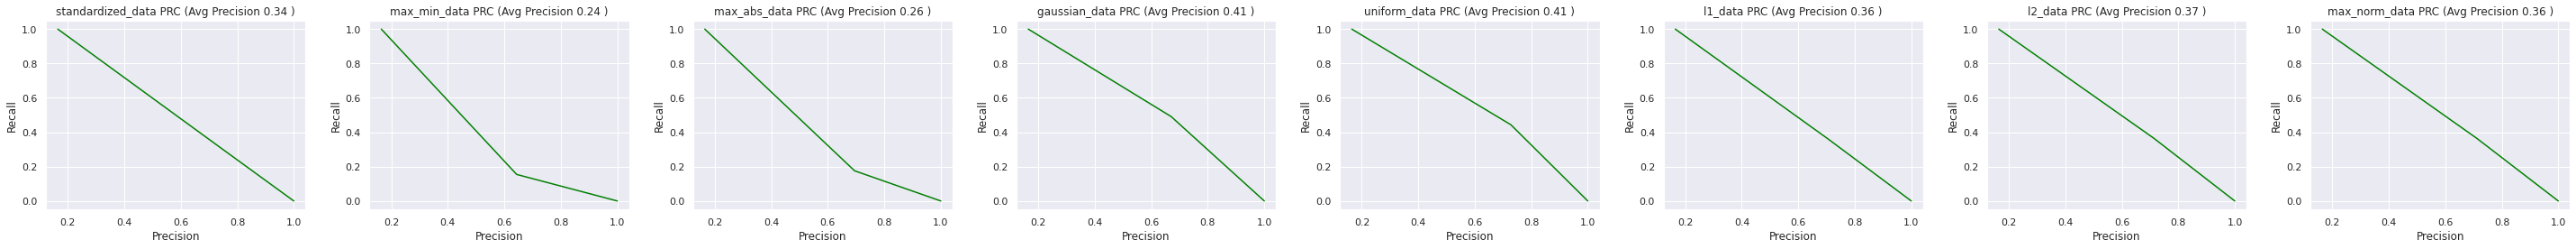

In [103]:
plot_precision_recall_curve(complete_data_dict, best_pre_rec_knn, best_scores_knn)

In [104]:
"""XGBoost Grid Search Under Each Scaled Data"""
params={
    "n_estimators":[100,200],
    "max_depth":[2,3],
    "learning_rate":[0.1,0.01],
    "reg_alpha":[0.1,0.2],
    "reg_lambda":[0.1,0.2],
    "base_score":[0.3,0.5],
    "importance_type":['gain','weight','cover','total_gain','total_cover'],
}

xgb_classifier = XGBClassifier(objective='binary:logistic', 
                              booster='gbtree', tree_method='auto', 
                              subsample=1, 
                              scale_pos_weight=5.46,
                              random_state=123)

path=f"{root_path}/xgb_best_params.pkl"
best_params_xgb, best_scores_xgb, best_model_xgb, best_matrix_xgb, best_roc_xgb, best_pre_rec_xgb = grid_search_params(complete_data_dict, data_label, params, xgb_classifier, path, cv=5)



=================standardized_data=====================
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning




=================max_min_data=====================
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


=================max_abs_data=====================
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


=================gaussian_data=====================
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


=================uniform_data=====================
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


=================l1_data=====================
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


=================l2_data=====================
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


=================max_norm_data=====================
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


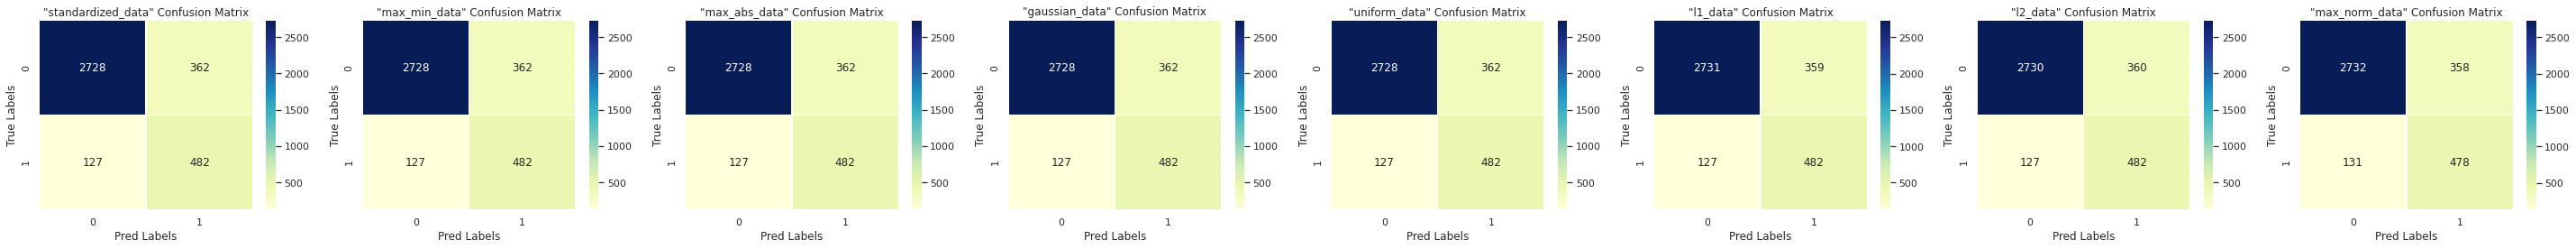

In [105]:
plot_confusion_matrix(complete_data_dict, best_matrix_xgb)

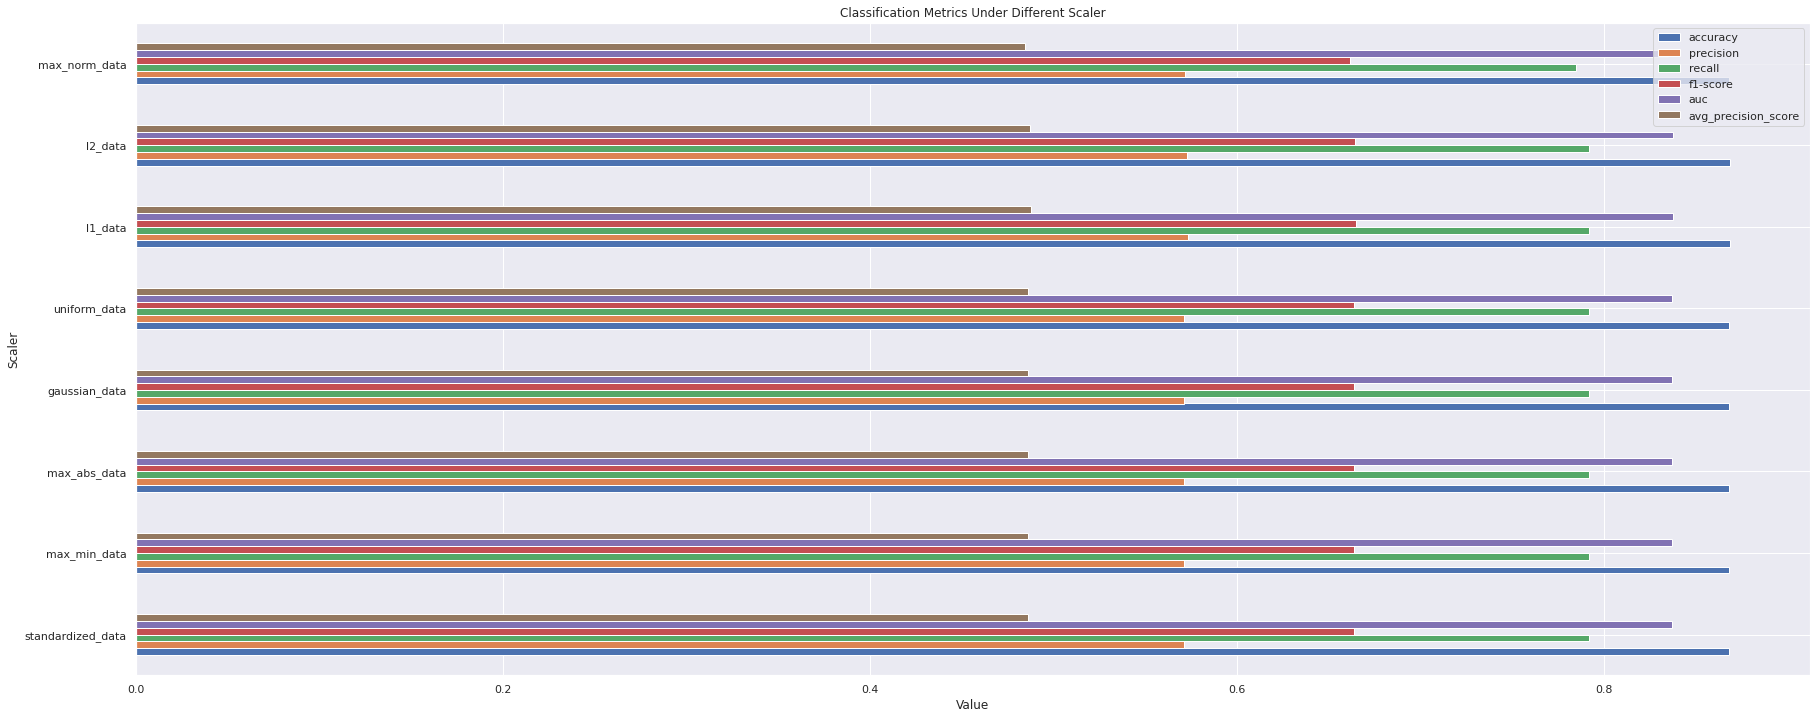

In [106]:
plot_classification_metrics(best_scores_xgb)

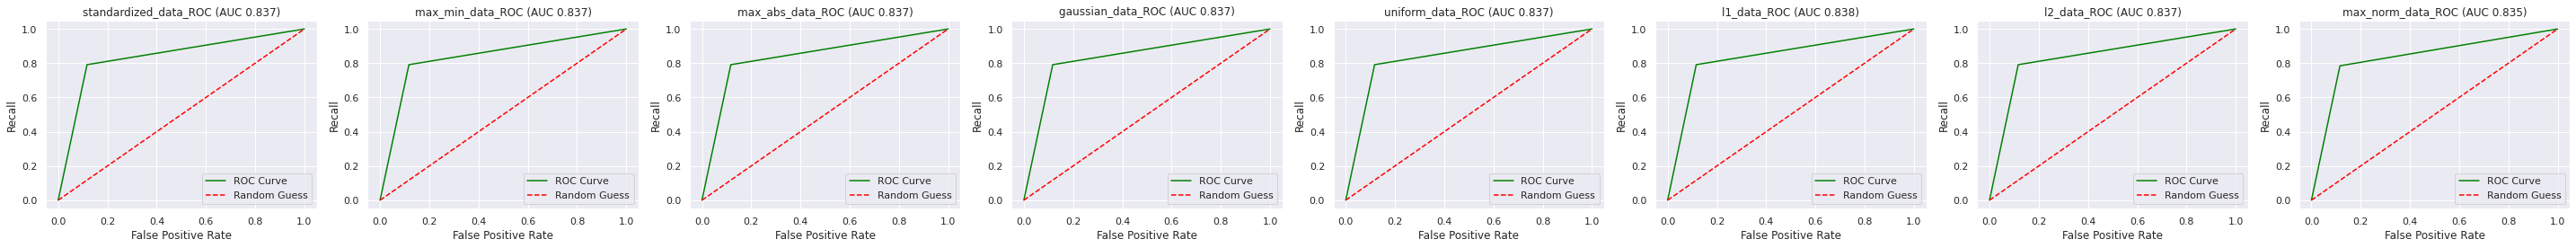

In [107]:
plot_roc_curve(complete_data_dict, best_roc_xgb, best_scores_xgb)

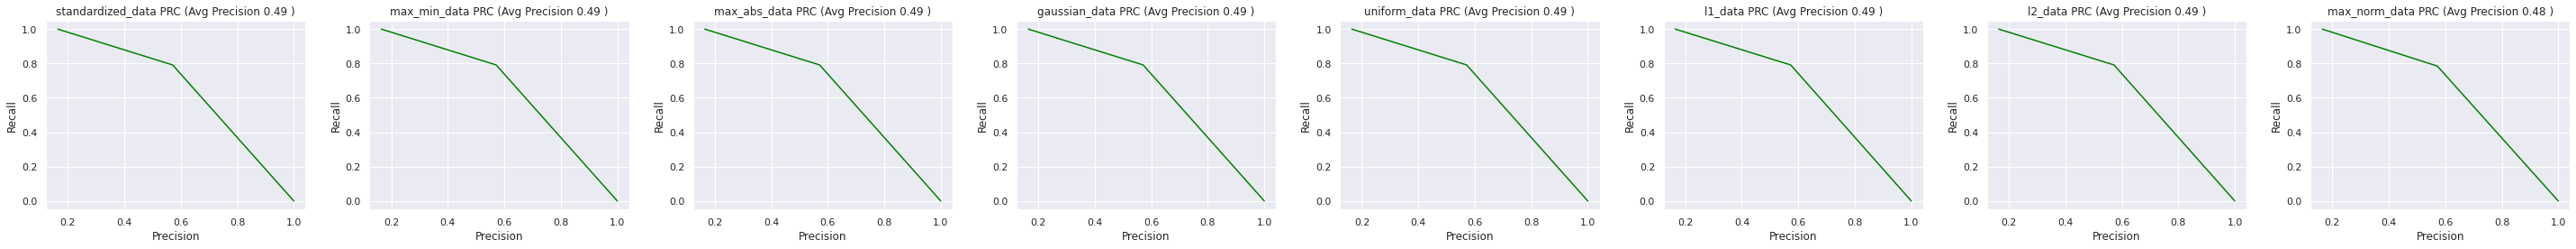

In [108]:
plot_precision_recall_curve(complete_data_dict, best_pre_rec_xgb, best_scores_xgb)

In [ ]:
"""load the params"""
temp_file=open(f"{root_path}/lrc_best_params.pkl", "rb")
best_params, best_scores, best_models, best_matrix= pickle.load(temp_file)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
